# Problem Statement

1. Calculate $c_{0}, c_{1}, c_{2}, c_{3}, r_{1}, r_{2}, r_{3}$ for the series given in Exercise 2.1. 
2. Make a graph of $r_{k}$, k = 0, 1, 2, 3

3. My interpretation : 
    - Of the TS in 2.1, find the estimates of both 
        1. c - autocovariance $(\hat{\gamma}_{k})$ 
        2. r - the autocorrelation $(\hat{\rho}_{k})$
        3. where k = 0, 1, 2, 3
    - Graph the autocorrelations at k
        - x-axis : k
        - y-axis : value
    
---
# Questions/Futher Explore

# TODO

- [x] Load Data

- [x] (2.1.12) **Estimate the ACov @ lag k :** $ \hat{\gamma}_{k} $ (gamma hat) = 1/N * $ \sum_{t=1}^{N - k} (z_{t} - \bar{z})(z_{t+k} - \bar{z}) $ k = 0, 1, 2,..., K

- [x] (2.1.12) Set : $ c_k $ = $ \hat{\gamma}_{k} $

- [x] (2.1.11) **Estimate the ACor @ lag k :** $ \hat{\rho}{_k} $ (rho hat) = $ c_k $ / $ c_0 $

- [x] (2.1.11) Set : $ r_k $ to  $ \hat{\rho}{_k} $

- [ ] Graph $ r_k $

---

---

In [1]:
import numpy as np
import pandas as pd

## Load Data

In [3]:
data = pd.read_csv("lewDataset.csv")
data

,measurements
0,-213
1,-564
2,-35
3,-15
4,141
...,...
195,-385
196,198
197,-218
198,-536


In [39]:
z = data['measurements']
# N = len(z)
ks = range(0, 50)
zbar = np.mean(z)
z, N, ks, zbar

(0     -213
 1     -564
 2      -35
 3      -15
 4      141
       ... 
 195   -385
 196    198
 197   -218
 198   -536
 199     96
 Name: measurements, Length: 200, dtype: int64,
 200,
 range(0, 50),
 -177.435)

## Estimate AutoCov @ lag k

1. **fill in eqs and differences**

---

- **Variance** is the spread ($\sigma^{2}$) of a single variable - single distribution
    - ***Think :*** 
        - Why (importance) :

- **Covariance** is the spread ($\gamma$) of two variables - joint distributions (JD)
    - cov[X, Y]
    - (JD) [Given two random variables that are defined on the same probability space, the joint probability distribution is the corresponding probability distribution on all possible pairs of outputs.] [Wiki](https://en.wikipedia.org/wiki/Joint_probability_distribution)
    - ***Think :*** 
        - var[X] and var[Y] = cov[X, Y]
        - So, of these two variables in the same probability space, how do they vary/differ?
        - Why (importance) : 
- **AutoCovariance** is the spread at lag k ($\gamma_{k}$) of two variables - joint distributions
    - $\gamma_{k}$ = $cov[z{_t}, z_t{_+}{_k}]$ = $E[come back to]$
    - ***Think :* **
        - covariance but w/ the same variable and different time steps
        - So, of these two time steps, spaced k intervals apart, in the same probability space, how do they vary/differ?
        - Why (importance) : gather insights (ie : spread or confidence) on the same variable but at different times
        
- **Estimated AutoCov** is the spread at lag k ($\hat{\gamma}_{k}$) of two variables - joint distributions
    - $ \hat{\gamma}_{k} $ (gamma hat) = 1/N * $ \sum_{t=1}^{N - k} (z_{t} - \bar{z})(z_{t+k} - \bar{z}) $ k = 0, 1, 2,..., K
    - ***Think :*** 
        - We want to find the estimated confidence in our single variable (z) at two different times t and t + k
            - Estimated bc we may ! be able to draw an exact value to due the complexity (of data, time it'll take, computations, etc)
            - If large, then high variance which results in a wide distribution but if small, then low variance and a narrow distribution
            - (?) Can I have a (-) confidence? If so, does this means that I'm ! confident at all?
                - Yes, can have a (-) Est AutoCov which implies that...
        - ***Analogy - Points in a basketball game of a single player***
            - Single variable : points (p)
            - p$_t$ : points when t = end of 1st quarter
            - $p{_t}{_+}{_k}$ : points when t + k = end of another quarter
            - Find the estimated confidence/spread at the end of the 1st quarter compared to the end of another quarter
                - Confidence/spread here can be pr() of scoring x points
        - Why (importance) : same as AutoCov except here it's an approx bc we may ! be able to get the true value

In [40]:
def est_autocov(data, lag_k, sample_mean): 
    """
    Calculate the estimated autocovariance
    
    :param data: numerical values in data
    :param lag_k: a list of k values
    :param sample_mean: mean of the data
    :return: a list of tuples (ck idex, ck float value)
    
    """
    
    gamma_k = 0
    
    N = len(data)
    for t in range(N - lag_k):
        # print(t, lag_k)
        # when we have a new index of lag_k, hence 0, 1, ..., K
 
        gamma_k += (data[t] - sample_mean) * (data[t + lag_k] - sample_mean)
            # print("gamma_k : ", t, gamma_k)
    return lag_k, gamma_k/N

In [41]:
c_ks = []

for i in range(len(ks)): 
    c_ks.append(est_autocov(z, ks[i], zbar))
    
c_ks

[(0, 76528.56577500004),
 (1, -23517.595646125),
 (2, -56657.944042250005),
 (3, 59285.855336625),
 (4, 15700.251415500008),
 (5, -68734.59878062503),
 (6, 28779.622398249987),
 (7, 48430.83590212498),
 (8, -58870.063744),
 (9, -9556.184915124997),
 (10, 63098.80773875),
 (11, -30644.598357374998),
 (12, -41808.83645349999),
 (13, 55982.608025375),
 (14, 5462.814454249996),
 (15, -57880.60436687498),
 (16, 30771.480036999994),
 (17, 36876.433015874994),
 (18, -53237.202280250014),
 (19, -2545.668876374998),
 (20, 53609.00165249999),
 (21, -31363.055518625006),
 (22, -32881.37568975001),
 (23, 51287.719164124996),
 (24, -48.40695700000298),
 (25, -50381.45885312501),
 (26, 31790.64832575),
 (27, 29733.49325462501),
 (28, -50070.91021650001),
 (29, 2004.9606623749976),
 (30, 48143.22476624997),
 (31, -32262.69242987499),
 (32, -27316.240651000004),
 (33, 49026.011477875),
 (34, -4012.3941932500006),
 (35, -45995.155439375005),
 (36, 33150.225189499964),
 (37, 24618.676343375),
 (38, -486

## Estimate AutoCor @ lag k

In [57]:
def est_autocor(data, lag_k, sample_mean):
    c_k = est_autocov(data, lag_k, sample_mean)
    # print("\nc_k : ", c_k[1])
    cnot = est_autocov(data, 0, sample_mean)
    # print("cnot : ", cnot[1])
    rho_hat_k = np.divide(c_k[1], cnot[1])
    # print("rho_hat_k : ", rho_hat_k)
    return lag_k, np.round(rho_hat_k, 2)

In [58]:
r_ks = []

for k in range(len(ks)):
    # print("k : ", k)
    r_ks.append(est_autocor(z, k, zbar))
r_ks

[(0, 1.0),
 (1, -0.31),
 (2, -0.74),
 (3, 0.77),
 (4, 0.21),
 (5, -0.9),
 (6, 0.38),
 (7, 0.63),
 (8, -0.77),
 (9, -0.12),
 (10, 0.82),
 (11, -0.4),
 (12, -0.55),
 (13, 0.73),
 (14, 0.07),
 (15, -0.76),
 (16, 0.4),
 (17, 0.48),
 (18, -0.7),
 (19, -0.03),
 (20, 0.7),
 (21, -0.41),
 (22, -0.43),
 (23, 0.67),
 (24, -0.0),
 (25, -0.66),
 (26, 0.42),
 (27, 0.39),
 (28, -0.65),
 (29, 0.03),
 (30, 0.63),
 (31, -0.42),
 (32, -0.36),
 (33, 0.64),
 (34, -0.05),
 (35, -0.6),
 (36, 0.43),
 (37, 0.32),
 (38, -0.64),
 (39, 0.08),
 (40, 0.58),
 (41, -0.45),
 (42, -0.28),
 (43, 0.62),
 (44, -0.1),
 (45, -0.55),
 (46, 0.45),
 (47, 0.25),
 (48, -0.61),
 (49, 0.14)]

# Graph ks

In [59]:
import matplotlib.pyplot as plt

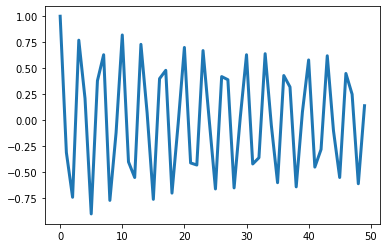

In [63]:
x = []
y = []

for idx in range(len(r_ks)):
    x.append(r_ks[idx][0])
    # print("x : ", x)
    y.append(r_ks[idx][1])
    # print("y : ", y, "\n")
    
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=3.0)

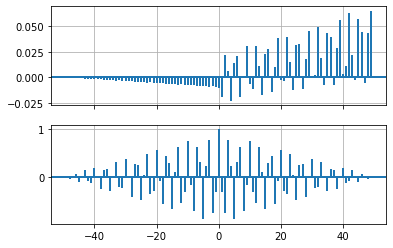

In [64]:
# print(k)
fig, [ax1, ax2] = plt.subplots(2, 1, sharex=True)
ax1.xcorr(x, y, usevlines=True, maxlags=k, normed=True, lw=2)
ax1.grid(True)

# ks x-axis; pho_k = -pho_k
ax2.acorr(y, usevlines=True, normed=True, maxlags=k, lw=2)
ax2.grid(True)